# Intent Classification

In [39]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout, Dense, Activation, Flatten, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.optimizers import SGD

In [40]:
# read into csv file
df = pd.read_csv('train.csv')
df.head()

,sentence,BookRestaurant,GetWeather,PlayMusic,RateBook
0,book The Middle East restaurant in IN for noon,1,0,0,0
1,Book a table at T-Rex distant from Halsey St.,1,0,0,0
2,I'd like to eat at a taverna that serves chili...,1,0,0,0
3,I have a party of four in Japan and need a res...,1,0,0,0
4,Please make a restaurant reservation for somew...,1,0,0,0


In [41]:
# shuffle data
df = shuffle(df)
df.head()

,sentence,BookRestaurant,GetWeather,PlayMusic,RateBook
814,book a spot at a restaurant faraway from 138th St,1,0,0,0
4151,"Play the playlist, A Mis NiÃ±os de 30.",0,0,1,0
5365,Plkay some sixties movement songs from Itunes,0,0,1,0
1961,I'd like to go to a restaurant in French Polyn...,1,0,0,0
2383,Tell me the weather forecast for 10/21/2024 in...,0,1,0,0


In [42]:
X_train = df["sentence"].fillna("fillna").values
y_train = df[["BookRestaurant", "GetWeather", "PlayMusic", "RateBook"]].values

In [43]:
X_train.shape, y_train.shape

((7929,), (7929, 4))

In [44]:
X_train[1], y_train[1] 

('Play the playlist, A Mis NiÃ±os de 30.', array([0, 0, 1, 0]))

# Preprocessing

In [45]:
text = X_train

In [46]:
Tokenizer = Tokenizer()

In [47]:
# text preprocessing
Tokenizer.fit_on_texts(text) 
Tokenizer_vocab_size = len(Tokenizer.word_index) + 1
Tokenizer_vocab_size

7522

In [48]:
X_train.shape, y_train.shape

((7929,), (7929, 4))

In [49]:
samples = 2500

X_train = X_train[samples:] 
y_train = y_train[samples:] 

X_val = X_train[:samples] 
y_val = y_train[:samples] 

In [50]:
X_train.shape, y_train.shape

((5429,), (5429, 4))

In [51]:
X_train_encoded_words = Tokenizer.texts_to_sequences(X_train)
X_val_encoded_words = Tokenizer.texts_to_sequences(X_val)

In [52]:
X_train_encoded_padded_words = sequence.pad_sequences(X_train_encoded_words, maxlen = 100)
X_val_encoded_padded_words = sequence.pad_sequences(X_val_encoded_words, maxlen = 100)

X_train_encoded_padded_words.shape, X_val_encoded_padded_words.shape

((5429, 100), (2500, 100))

In [53]:
X_val_encoded_padded_words, X_train_encoded_padded_words

(array([[   0,    0,    0, ..., 2205,    4,   95],
        [   0,    0,    0, ...,   71,    1,   53],
        [   0,    0,    0, ...,  180,  162,  260],
        ...,
        [   0,    0,    0, ...,    0,    6,  137],
        [   0,    0,    0, ..., 2194,   13,  143],
        [   0,    0,    0, ...,   19,   38, 1375]], dtype=int32),
 array([[   0,    0,    0, ..., 2205,    4,   95],
        [   0,    0,    0, ...,   71,    1,   53],
        [   0,    0,    0, ...,  180,  162,  260],
        ...,
        [   0,    0,    0, ...,    6, 1472, 2591],
        [   0,    0,    0, ...,  347,    5,  458],
        [   0,    0,    0, ...,    3, 2550,  155]], dtype=int32))

In [54]:
y_train.shape, y_val.shape

((5429, 4), (2500, 4))

# Build and Train the Model

In [55]:
model = Sequential()

model.add(Embedding(Tokenizer_vocab_size, 32, input_length = 100)) 

model.add(LSTM(10))
model.add(Dropout(0.5))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(200, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           240704    
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                1720      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               4400      
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1604      
Total params: 248,428
Trainable params: 248,428
Non-trainable params: 0
________________________________________________

In [56]:
Nadam = tf.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
model.compile(loss='categorical_crossentropy', optimizer=Nadam, metrics=['accuracy'])

In [57]:
history  = model.fit(X_train_encoded_padded_words,y_train, epochs = 3, batch_size=32, verbose=1, validation_data=(X_val_encoded_padded_words, y_val))

Epoch 1/3
170/170 [==============================] - 2s 9ms/step - loss: 0.4964 - accuracy: 0.7828 - val_loss: 0.0219 - val_accuracy: 0.9956
Epoch 2/3
170/170 [==============================] - 1s 7ms/step - loss: 0.0783 - accuracy: 0.9766 - val_loss: 0.0051 - val_accuracy: 0.9988
Epoch 3/3
170/170 [==============================] - 1s 7ms/step - loss: 0.0501 - accuracy: 0.9838 - val_loss: 0.0015 - val_accuracy: 0.9992


In [58]:
# save the model
model.save("Intent_Classification.h5")

# Plots

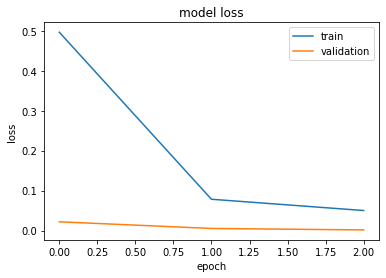

In [59]:
#loss
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

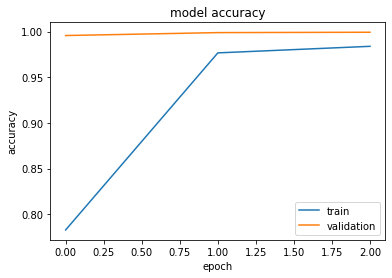

In [60]:
#accuracy
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# Loss and Accuracy 

In [61]:
model.evaluate(X_val_encoded_padded_words, y_val)

79/79 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.9992


[0.001539326156489551, 0.9991999864578247]

# Predictions 

In [71]:
def predict(text):
    sentence = text
    tokens = Tokenizer.texts_to_sequences([text])
    tokens = pad_sequences(tokens, maxlen = 100)
    prediction = model.predict(np.array(tokens))
    pred = np.argmax(prediction)
    classes = ['BookRestaurant','GetWeather','PlayMusic','RateBook']
    result = classes[pred]
    return result

In [72]:
predict("is it raining ?")

'GetWeather'

In [73]:
predict("i would like to book a table at hotel Orion for 29th june")

'BookRestaurant'

In [74]:
predict("An Artist released a new music album ")

'PlayMusic'

In [75]:
predict("this novel deserves a rating of 10")

'RateBook'